SCC5809 - Redes Neurais Artificiais e Aprendizado Profundo

**Nome**:  - **NUSP**: 

# Exercício 4

## Bibliotecas

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from keras.layers import Dropout
# TCN
!pip install keras-tcn
from tcn import TCN, tcn_full_summary
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

2024-10-09 12:42:14.058697: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 12:42:15.649535: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 12:42:16.514061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 12:42:17.413177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 12:42:17.564567: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 12:42:18.800115: I tensorflow/core/platform/cpu_feature_gu

## Carregando os dados (IPCA)

In [2]:
inflacao = 'inflacao.csv'

In [3]:
df = pd.read_csv(inflacao)

In [4]:
df.shape

(521, 26)

In [5]:
df_ipca = pd.DataFrame(data=df.values, index=df.referencia, columns=df.columns)

In [6]:
df_ipca.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
referencia,,,,,,,,,,,,,,,,,,,,,
1980-01,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,4.48,4.7,4.7,0.0,0.0,0.0,0.0,0.0,2932.8,False
1980-02,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
1980-03,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,12.17,12.8,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False
1980-04,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,16.1,3.13,30.16,0.0,0.0,0.0,0.0,0.0,2932.8,False
1980-05,1980-05,1980,5,198005,5.7,31.63,0.0,0.0,0.0,0.0,...,22.62,4.86,35.02,0.0,0.0,0.0,0.0,0.0,4149.6,False


Vamos remover colunas que não são valores mensais e meta da Selic, visto que a meta é uma expectativa e não um valor real.

In [7]:
columns_to_remove = ['referencia', 'ano', 'mes', 'ano_mes', 'ipca_acumulado_ano', 'ipca_acumulado_doze_meses', 'ipca15_variacao', 'ipca15_acumulado_ano', 'ipca15_acumulado_doze_meses', 'inpc_acumulado_ano', 'inpc_acumulado_doze_meses', 'ipa_acumulado_ano', 'ipc_fipe_acumulado_ano', 'incc_acumulado_ano', 'incc_m_acumulado_ano', 'selic_meta', 'consolidado_ano']

In [8]:
df_ipca.drop(columns=columns_to_remove)

,ipca_variacao,inpc_variacao,ipa_variacao,ipc_fipe_variacao,incc_variacao,incc_m_variacao,selic_ano,juros_reais,salario_minimo
referencia,,,,,,,,,
1980-01,6.62,6.56,7.31,4.48,4.7,0.0,0.0,0.0,2932.8
1980-02,4.62,4.15,3.69,3.35,9.53,0.0,0.0,0.0,2932.8
1980-03,6.04,5.12,6.32,4.34,12.8,0.0,0.0,0.0,2932.8
1980-04,5.29,4.85,6.69,3.93,3.13,0.0,0.0,0.0,2932.8
1980-05,5.7,5.53,7.32,6.52,4.86,0.0,0.0,0.0,4149.6
...,...,...,...,...,...,...,...,...,...
2023-01,0.53,0.46,-0.19,0.63,0.46,0.32,13.65,7.45,1302.0
2023-02,0.84,0.77,-0.04,0.43,0.05,0.21,13.65,7.62,1302.0
2023-03,0.71,0.64,-0.71,0.39,0.3,0.18,13.65,8.6,1302.0


## Pré-processamento

### Separando x e y

In [9]:
#x_ipca = df_ipca[['inpc_variacao', 'ipa_variacao', 'ipc_fipe_variacao', 'incc_variacao', 'incc_m_variacao', 'selic_ano', 'juros_reais', 'salario_minimo']]
x_ipca = df_ipca['ipca_variacao']

In [10]:
x_ipca.head(5)

referencia
1980-01    6.62
1980-02    4.62
1980-03    6.04
1980-04    5.29
1980-05     5.7
Name: ipca_variacao, dtype: object

In [11]:
y_ipca = df_ipca['ipca_variacao']

In [12]:
y_ipca.head(5)

referencia
1980-01    6.62
1980-02    4.62
1980-03    6.04
1980-04    5.29
1980-05     5.7
Name: ipca_variacao, dtype: object

Vamos realizar os seguintes procedimentos:
- Preparando o tamanho para entrada na rede neural
- Normalização dos dados

### Organizando nossos inputs e saídas esperadas

Vamos prever o ipca do pŕoximo mês usando dados dos últimos 12 meses. Ou seja, teremos uma sequência de 12 meses de inputs/dados e queremos predizer o ipca para o mês depois desta sequência.

In [13]:
# Queremos prever o mês seguinte da sequência, então a label está um passo no futuro apenas
shift_steps = 1

In [14]:
y_ipca = y_ipca.shift(-shift_steps)

In [15]:
y_ipca.tail()

referencia
2023-01    0.84
2023-02    0.71
2023-03    0.61
2023-04    0.23
2023-05    None
Name: ipca_variacao, dtype: object

Removendo agora os valores que não temos devido ao shift de 1 mês.

In [16]:
x_ipca = x_ipca.values[0:-shift_steps]
x_ipca.shape

(520,)

In [17]:
y_ipca = y_ipca.values[0:-shift_steps]
y_ipca.shape

(520,)

### Normalizando x

In [18]:
print(x_ipca[:5])

[6.62 4.62 6.04 5.29 5.7]


In [19]:
print(x_ipca.shape)

(520,)


In [20]:
x_ipca = x_ipca.reshape(-1, 1)
print(x_ipca.shape)

(520, 1)


In [21]:
x_scaler = MinMaxScaler()
x_ipca_norm = x_scaler.fit_transform(x_ipca)


In [22]:
print(x_ipca_norm[:5])

[[0.08787769]
 [0.06380161]
 [0.08089563]
 [0.0718671 ]
 [0.0768027 ]]


### Normalizando y

In [23]:
y_ipca = y_ipca.reshape((len(y_ipca),1))

In [24]:
print(y_ipca[:5])

[[4.62]
 [6.04]
 [5.29]
 [5.7]
 [5.31]]


In [25]:
y_scaler = MinMaxScaler()
y_ipca_norm = y_scaler.fit_transform(y_ipca)

In [26]:
print(y_ipca_norm[:5])

[[0.06380161]
 [0.08089563]
 [0.0718671 ]
 [0.0768027 ]
 [0.07210786]]


### Separando em conjunto de treino e teste

In [27]:
train_split = 0.7

In [28]:
num_train = int(train_split * len(x_ipca_norm))
print(num_train)

364


In [29]:
num_test = len(x_ipca_norm) - num_train
print(num_test)

156


In [30]:
x_train = x_ipca_norm[0:num_train]
x_test = x_ipca_norm[num_train:]

In [31]:
y_train = y_ipca_norm[0:num_train]
y_test = y_ipca_norm[num_train:]

### TimeSeriesSplit

In [32]:
from sklearn.model_selection import TimeSeriesSplit

In [33]:
n_splits = 5

In [34]:
tscv = TimeSeriesSplit(n_splits=n_splits)

### Função para gerar batches

In [35]:
seq_length = 12

In [36]:
def create_sequences(data, data_target, seq_length):
    X, y = [], []
    start_index = data_target[0]
    end_index = data_target[len(data_target) - 1]

    #print(f'len(data):{len(data)}\ndata.shape:{data.shape}\nlen(data_target):{len(data_target)}\ndata_target.shape:{data_target.shape}')
    for i in range(len(data) - seq_length):
        X.append(data[i : i+(seq_length)])
        y.append(data_target[i+(seq_length)-1])  # O valor a ser previsto é o do próximo mês
        #print(f"indices do x {[i for i in range (i, i+(seq_length))]} \n  indice y {i+(seq_length)-1}")

    return np.array(X), np.array(y)

```Python
def create_sequences(data, target_index, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, target_index])  # O valor a ser previsto é o do próximo mês
    return np.array(X), np.array(y)
```

```Python
from sklearn.model_selection import TimeSeriesSplit

# Exemplo de TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Aplicando o split
for train_index, test_index in tscv.split(data):
    train_data, test_data = data[train_index], data[test_index]

    # Criação das sequências temporais
    X_train, y_train = create_sequences(train_data, target_index, sequence_length)
    X_test, y_test = create_sequences(test_data, target_index, sequence_length)

    # Agora você pode treinar a RNN com os dados desta divisão

```

## Criando o modelo

### Building the model

In [37]:
def build_model(model_type='LSTM', neurons=50, input_shape=(None, 1)):
  model = Sequential()
  if model_type == 'LSTM':
    model.add(tf.keras.Input(shape=input_shape))
    model.add(LSTM(neurons, activation='relu'))
  elif model_type == 'GRU':
    model.add(tf.keras.Input(shape=input_shape))
    model.add(GRU(neurons, activation='relu'))
  elif model_type == 'TANH':
    model.add(tf.keras.Input(shape=input_shape))
    model.add(SimpleRNN(neurons, activation='relu'))
  elif model_type == 'TCN':
    model.add(tf.keras.Input(shape=input_shape))
    model.add(TCN(neurons))  # Adicionando a camada TCN

  model.add(Dense(1, activation='sigmoid'))
  adam = tf.keras.optimizers.Adam(learning_rate=0.0005)
  model.compile(optimizer=adam, loss='mean_squared_error')
  return model

## Treinamento

In [63]:
epochs = 50

In [64]:
import math
from sklearn.metrics import mean_squared_error
#from math import mean_squared_error

In [65]:
def train(model, x_train, x_test, y_train, y_test, seq_length=12, epochs=100, verbose=0):
  rmse_scores = []
  histories = []
  #model = build_model(model_name, input_shape=(X_train_seq.shape[1], 1))
  for train_index, test_index in tscv.split(x_train):
    # Obtem o indices das amostras que serao utilizadas para os folds
    x_train_fold, x_test_fold, y_train_fold, y_test_fold = x_train[train_index], x_train[test_index], y_train[train_index], y_train[test_index]
    # Gera as sequencias de treinamento e suas labels usando o fold
    x_train_fold_seq, y_train_fold_seq = create_sequences(x_train_fold, y_train_fold, seq_length)
    # Gera as sequencias de teste e suas labels usando o fold
    x_test_fold_seq, y_test_fold_seq = create_sequences(x_test_fold, y_test_fold, seq_length)

    history = model.fit(x_train_fold_seq, y_train_fold_seq, epochs=epochs, verbose=verbose)  # Ajuste as épocas conforme necessário
    histories.append(history.history['loss'])

    predictions = model.predict(x_test_fold_seq)

    rmse = math.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test_fold_seq), y_scaler.inverse_transform(predictions)))
    rmse_scores.append(rmse)

  return rmse_scores, histories

In [84]:
def test(model, x_test, y_test, seq_length=12):
  x_test_seq, y_test_seq = create_sequences(x_test, y_test, seq_length=seq_length)
  result_test = model.evaluate(x_test_seq, y_test_seq)
  return result_test

In [85]:
models_names = ['TANH', 'LSTM', 'GRU', 'TCN']
rmse_scores_folds_per_model = []
history_per_model = []
test_result_per_model = []
n_features = len(x_train[0])
input_shape = (seq_length, n_features)
for i, model_name in enumerate(models_names):
  # Cria o modelo
  model = build_model(model_type=model_name, input_shape=input_shape)
  # Treinamento
  rmse_scores_folds, history = train(model, x_train, x_test, y_train, y_test, seq_length, epochs=epochs, verbose=0)
  # Teste
  test_result = test(model, x_test, y_test, seq_length=seq_length)
  # Armazena o os scores rmse e o history de losses durante o processo de treinamento
  if i == 0:
    rmse_scores_folds_per_model = [rmse_scores_folds]
    history_per_model = [history]
    test_result_per_model = [[test_result]]
  else:
    #print(f'rmse array: {rmse_scores_folds_per_model}\nhistory array: {history_per_model}\ntest result {test_result_per_model}')
    rmse_scores_folds_per_model = np.append(rmse_scores_folds_per_model, [rmse_scores_folds], axis=0)
    history_per_model = np.append(history_per_model, [history], axis=0)
    test_result_per_model = np.append(test_result_per_model, [[test_result]], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1624e-05  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8075e-05  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4059e-05  
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0104e-05  


In [86]:
def plotTrainingPerformance(history, epochs, models_names):
  epochs_vec = [i for i in range(len(history[0]))]
  for i in range(len(history)):
    plt.plot(epochs_vec, history[i], label=models_names[i])

  plt.legend(title='Models')
  plt.title('Loss over epochs')
  plt.show(True)
  return

In [87]:
def plotRMSEScores(rmse, models_names):
  aux = [i for i in range(len(rmse[0]))]
  for i in range(len(rmse)):
    plt.plot(aux, rmse[i], 'o-', label=models_names[i])

  plt.legend(title='Models')
  plt.title('RMSE Scores on folds')
  plt.show(True)
  return

In [88]:
def TestResult(test_result, models_names):
  aux = test_result.reshape(4)
  plt.bar(models_names, aux)
  plt.xticks([0,1,2,3], models_names)
  plt.title('Loss on Test set per model')
  plt.show(True)
  return

In [89]:
history_per_model = history_per_model.reshape(4, n_splits * epochs)

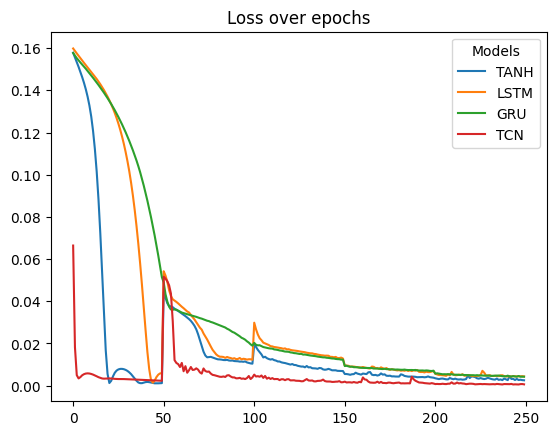

In [90]:
plotTrainingPerformance(history_per_model, epochs, models_names)

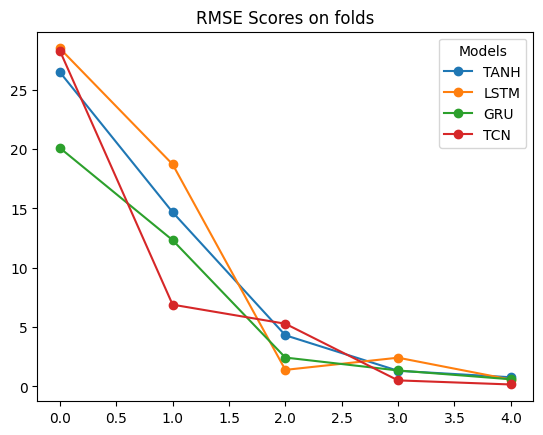

In [91]:
plotRMSEScores(rmse_scores_folds_per_model, models_names)

[[9.83768186e-05]
 [5.33837738e-05]
 [5.88915427e-05]
 [1.42133858e-05]]


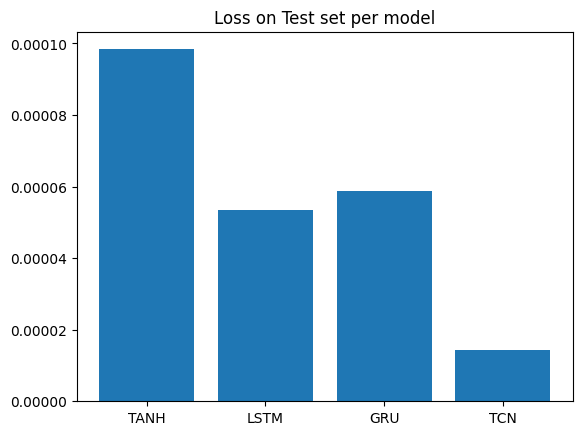

In [92]:
print(test_result_per_model)
TestResult(test_result_per_model, models_names)